# Problemas de Advección

En los 2 cuadernos previos de este modulo, desarrollamos un modelo de trafico vehicular y exploramos [diferentes alternativas de esquemas numericos](./03_02_EsquemasConveccion.ipynb). En cuanto al adecuado comportamiento del sistema, hemos observado que muchas de las restricciones provienen de los metodos numericos empleados en la solucion del problema, pero asimismo veremos que otras restricciones estan impuestas por el modelo que planteamos!

##  Flujo de tráfico vehicular, revisado

### Mejora del modelo de flujo

Como hemos visto en el cuaderno 1, los autos obedecen una ley de conservacion tipica

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

donde $F$ es el flujo, $F=\rho u$. A partir de la experiencia, sabemos que la velocidad de trafico es funcion de la densidad de trafico, y hemos propuesto como primer aproximacion una relacion lineal entre ambas. Asi,

$$
\begin{equation}
F(\rho) = \rho \, u_{max}\left(1 - \frac{\rho}{\rho_{max}} \right)
\end{equation}
$$

Este modelo de flujo satisface ambos requerimientos, basados en una observacion cualitativa del trafico vehicular, a saber:
1. $u \rightarrow u_{max}$ y $F\rightarrow 0$ cuando $\rho \rightarrow 0$.
2. $u \rightarrow 0$ a medida que $\rho \rightarrow \rho_{max}$

Sin embargo, este modelo conduce a algunos resultados **no** realistas. Por ejemplo, notamos que si la velocidad de trafico es una funcion lineal de la densidad, la funcion flujo sera cuadratica. En este caso, el flujo maximo ocurrira cuando $\rho^{\star} = \rho_{max}/2$, correspondiendo a una velocidad de trafico $u_{max}/2$.

![velocity_and_flux](./figuras/velocity_and_flux.png)
#### Velocidad de trafico (izquierda) y flujo (derecha) vs. densidad.

Una buena cuestion de planteo seria: deberia el flujo maximo en un dado tramo de autopista poseer una dependencia estricta de la velocidad maxima permitida? En otras palabras, esperamos que el flujo maximo aumente si permitimos arbitrariamente altas velocidades?

Probablemente no. Pero deberia haber alguna velocidad de trafico ideal, $u^{\star}$, que corresponda a una densidad de trafico ideal, $\rho^{\star}$, para la cual resulte un flujo de trafico maximo:

$$
\begin{equation}
F_{\rm max} = \rho^{\star}u^{\star}
\end{equation}
$$

En principio procuramos introducir un modelo de flujo que sea cubico en $\rho$ en lugar de cuadratico:

$$
\begin{equation}
F(\rho) = u_{\rm max}\rho\;(1 - A\rho - B \rho^2)
\end{equation}
$$

Este nuevo modelo satisface aun el primer criterio citado anteriormente: $F\rightarrow 0$ cuando $\rho \rightarrow 0$. Ademas, imponemos las siguientes condiciones:

* Cuando $\rho = \rho_{\rm max}$ el flujo de trafico se aproxima a cero:

$$
\begin{equation}
F(\rho_{\rm max}) = 0 = u_{\rm max}\, \rho_{\rm max}\;(1 - A \rho_{\rm max} - B \rho_{\rm max}^2)
\end{equation}
$$

* El flujo maximo ocurre cuando $\rho = \rho^{\star}$, entonces $F'(\rho^{\star}) = 0$:

$$
\begin{equation}
F'(\rho^{\star}) = 0  = u_{\rm max}\;(1 - 2A\rho^{\star} - 3B(\rho^{\star})^2)
\end{equation}
$$

* $u = u^{\star}$ se obtiene cuando $\rho = \rho^{\star}$:

$$
\begin{equation}
u^{\star} = u_{\rm max}\;(1 - A \rho^{\star} - B(\rho^{\star})^2)
\end{equation}
$$

Tenemos entonces 3 ecuaciones y 4 incognitas: $A,B,\rho^{\star}, u^{\star}$. Sin embargo, en la practica, la velocidad de trafico ideal se obtiene para una autopista dada por medio de observaciones. En forma similar a $u_{max}$ y $\rho_{max}$ sera por lo tanto considerada como un parametro del modelo.

### Resolviendo la nueva ecuacion de flujo

A fin de resolver el sistema de ecuaciones anterior emplearemos la libreria Python de matematica simbolica [SymPy](http://sympy.org/en/index.html). Ya hemos empleado SymPy en el [cuaderno correspondiente a la ecuacion de Burgers](../modulo2/02_04_Burgers1D.ipynb) del Modulo 2.

Comenzamos importando SymPy, inicializando la salida $\LaTeX$ y definiendo un conjunto de variables simbolicas que emplearemos en el calculo.

In [78]:
import sympy
sympy.init_printing()

(u_max, u_star, rho_max,
 rho_star, A, B) = sympy.symbols('u_max u_star rho_max rho_star A B')

A continuacion, usamos `sympy.Eq()` para definir el sistema de ecuaciones anterior en terminos de variables simbolicas. La funcion `sympy.Eq()` crea una igualdad entre 2 objetos SymPy, pasados como argumentos separados por una coma. El signo *igual* se emplea en este caso para asignar una ecuacion a un nombre: de esta forma, `eq1`, `eq2`, `eq3` seran nombres para igualdades simbolicas!

In [79]:
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

Podemos verificarlo ejecutando estos nombres en una celda de codigo:

In [80]:
eq1

In [81]:
eq2

In [82]:
eq3

Como hemos mencionado anteriormente, tenemos 3 ecuaciones y 3 incognitas (asumiendo que disponemos de un valor observado para la velocidad de trafico ideal $u_{star}$) ... existe entonces una solucion!

Para eliminar el termino con $B$ en `eq2` y dejarla entonces en terminos de $A$ y $\rho^{\star}$, deberiamos restar `3*eq3`. Si procuramos restar ecuaciones empleando sus nombres, veremos que **NO** es posible usar operadores matematicos *directamente* sobre las ecuaciones SymPy, puesto que se trata en efecto de *igualdades*:

In [83]:
eq2 - 3 * eq3

TypeError: unsupported operand type(s) for *: 'int' and 'Equality'

Vemos que SymPy **NO** manipula algebraicamente el lado izquierdo y derecho de ambas ecuaciones. Para lograrlo, generamos una ecuacion *nueva* efectuando operaciones por separado para el lado izquierdo (LHS) y el lado derecho (RHS) para luego recombinar el resultado:

In [84]:
eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)
eq4

SymPy ofrece varios metodos para ayudar a reducir expresiones. Podemos usar [`simplify()`](http://docs.sympy.org/latest/modules/simplify/simplify.html?highlight=simplify#sympy.simplify.simplify.simplify) a fin de procurar disponer una expresion mas *simple*:

In [85]:
eq4.simplify()

Otra funcion SymPy que nos ayuda a examinar expresiones complejas es [`expand()`](http://docs.sympy.org/latest/modules/core.html?highlight=expand#sympy.core.function.expand). Veamos:

In [86]:
eq4.expand()

Vemos que `eq4` nos permite expresar $\rho^{\star}$ en terminos de $A$. Luego podriamos manipular `eq1` para expresar $B$ en terminos de $A$, y por ultimo reemplazar ambos resultados en `eq2` dejando esta ecuacion en terminos de $A$. Para esto, podemos emplear las funciones SymPy [`solve()`](http://docs.sympy.org/dev/modules/solvers/solvers.html#sympy.solvers.solvers.solve) y `subs()`, respectivamente. Los argumentos que pasamos a `solve()` son la igualdad que requerimos resolver y el simbolo para el cual resolver.

**Nota**: `sympy.solve()` devuelve los resultados en una *lista*, puesto que a menudo se obtienen multiples soluciones para una dada variable. Estas ecuaciones lineales devolveran solucion unica, a la cual nos referimos invocando al elemento `[0]` de la lista.

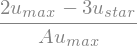

In [87]:
rho_sol = sympy.solve(eq4, rho_star)[0]
rho_sol

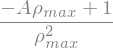

In [88]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

Los argumentos de la funcion SymPy [`subs()`](http://docs.sympy.org/dev/modules/core.html#sympy.core.basic.Basic.subs) son dados como pares *(viejo, nuevo)*, donde la expresion *nuevo* sustituye a la expresion *viejo*. Por consiguiente en `eq2`, sustituimos `rho_sol` en lugar de `rho_star` y sustituimos `B_sol` en lugar de `B`.

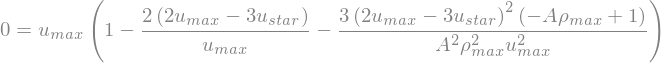

In [89]:
quadA = eq2.subs([(rho_star, rho_sol), (B, B_sol)])
quadA

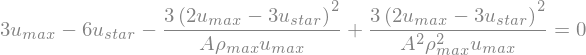

In [90]:
quadA.simplify()

La ecuacion resultante es cuadratica en $A$, por lo cual la funcion `solve()` devolvera una lista con las 2 raices.

In [91]:
A_sol = sympy.solve(quadA, A)

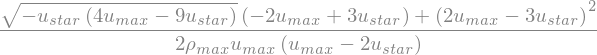

In [92]:
A_sol[0]

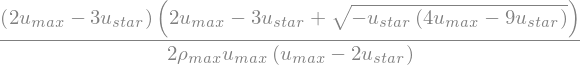

In [93]:
A_sol[1]

### Evaluando la nueva ecuacion de flujo

Aqui debemos seleccionar la raiz positiva, de otro modo nuestro modelo tendria una inconsistencia. A fin de estimar su valor, alimentamos el modelo con algunos valores realistas.

Comencemos con los mismos valores numericos que empleamos en el [cuaderno 1](./03_01_LeyConservacion.ipynb) para $\rho_{\rm max}$ y $u_{\rm max}$. Ademas debemos suministar un valor para $u^{\star}$, cantidad que podriamos observar experimentalmente en una autopista. Proponemos $u^{\star} = 0.7\, u_{\rm max}$ para este ejercicio. Usaremos entonces:

$$
\begin{align} 
\rho_{\rm max} &=10.0 \nonumber\\ u_{\rm max} &=1.0 \nonumber\\ u^{\star} &=0.7 \nonumber
\end{align}
$$

Ahora evaluemos el resultado para cada raiz de $A$ usando la funcion `evalf()`:

In [94]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

In [95]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

A fin de quedarnos con la raiz positiva usamos la funcion `max`:

In [96]:
A_val = max(A_val_0, A_val_1)
A_val

Ahora evaluamos $B$:

In [97]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

### Turn off $\LaTeX$

Deshabilitamos la salida $\LaTeX$ para el resto del ejercicio:

In [98]:
sympy.init_printing(use_latex=False)

## Problema del semaforo, revisado

Re-examinemos el problema del semaforo tratado en el [cuaderno 1](./03_01_LeyConservacion.ipynb) empleando nuestra *nueva* ecuacion de flujo de trafico.

Hemos empleado las variables `rho_max` y `u_max` en nuestro codigo SymPy para lo cual las definimos como `symbols`. Chequeamos el estado de tales variables empleando `type()`:  

In [99]:
print(type(rho_max), type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


Si procuramos usar variables SymPy con vectores NumPy, Python **NO** lo va a interpretar! Re-definimos entonces estas variables como `floats`:   

In [100]:
rho_max = 10.0
u_max = 1.0

In [101]:
def flux(rho, u_max, A, B):
    """
    Computes the traffic flux for the better model.
    
    Parameters
    ----------
    rho : numpy.ndarray
       Traffic density along the road as a 1D array of floats.
    u_max : float
        Maximum speed allowed on the road.
    A : float
        Scaling coefficient for rho.
    B : float
        Scaling coefficient for rho squared.
    
    Returns
    -------
    F : numpy.ndarray
        The traffic flux along the road as a 1D array of floats.
    """
    F = rho * u_max * (1.0 - A * rho - B * rho**2)
    return F

In [102]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [103]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [104]:
def rho_green_light(x, rho_light):
    """
    Computes the "green light" initial condition.
    It consists of a shock with a linear distribution behind it.
    
    Parameters
    ----------
    x : numpy.ndarray
        Locations on the road as a 1D array of floats.
    rho_light : float
        Car density at the stoplight.
    
    Returns
    -------
    rho : numpy.ndarray
        The initial car density along the road
        as a 1D array of floats.
    """
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [105]:
# Set parameters.
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
nt = 30  # number of time steps to compute
rho_light = 5.0  # car density at the traffic light.

# Define the locations on the road.
x = numpy.linspace(0.0, L, num=nx)

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

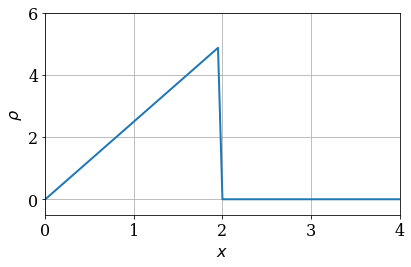

In [106]:
# Plot the initial car density on the road.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 6.0)
pyplot.tight_layout();

In [107]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    """
    Computes the traffic density on the road 
    at a certain time given the initial traffic density.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial car density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_value : float
        The constant density at the first station.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [108]:
# Set time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, A_val, B_val)

Ahora que hemos calculado la *historia* de la densidad de trafico a lo largo de la autopista, creamos una animacion para visualizar los resultados.

In [109]:
from matplotlib import animation
from IPython.display import HTML

In [110]:
def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [111]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

<div class="alert alert-block alert-danger">
That definitely looks different!  Do you think this is more or less accurate than our previous model?
</div>

##### Dig Deeper

<div class="alert alert-block alert-success">
The new traffic-flux model that we developed here changes the way that traffic patterns evolve. In this lesson, we only experimented with the most basic scheme: forward-time, backward-space.  Try to implement the green-light problem using one of the second-order schemes from <a href="./03_02_EsquemasConveccion.ipynb">cuaderno 2</a>. 
</div>

## Referencias

* Neville D. Fowkes and John J. Mahony, *An Introduction to Mathematical Modelling*, Wiley & Sons, 1994. Chapter 14: Traffic Flow.

---

###### The cell below loads the style of the notebook.

In [113]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())